In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [10]:
# 결측값이 있는지 확인합니다. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
# 분석에 필요한 컬럼만 선택합니다. 
df = df[["TV", "radio", "newspaper", "sales"]]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
# 기술통계를 확인합니다. 
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

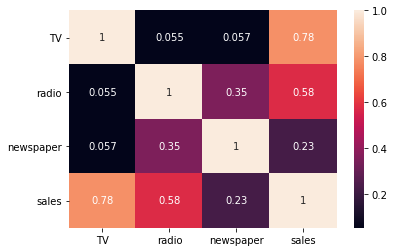

In [13]:
# 변수간의 correlation을 확인합니다. 
corr = df.corr()
sns.heatmap(corr, annot=True)

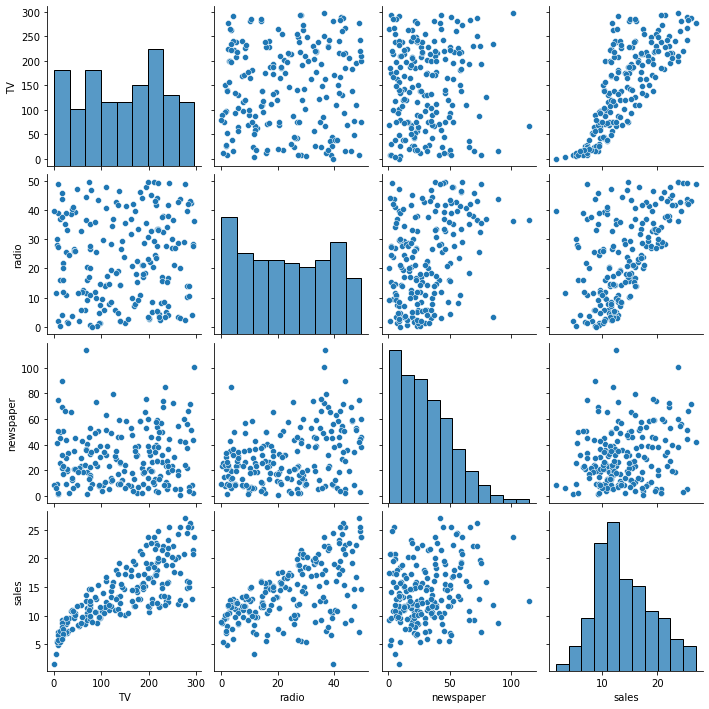

In [14]:
# 변수간의 pairplot을 그려봅니다. 
sns.pairplot(df[["TV", "radio", "newspaper", "sales"]])
plt.show()

In [15]:
# Labels와 features를 지정해줍니다. 
Labels = df["sales"]
features = df[["TV", "radio", "newspaper"]]

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

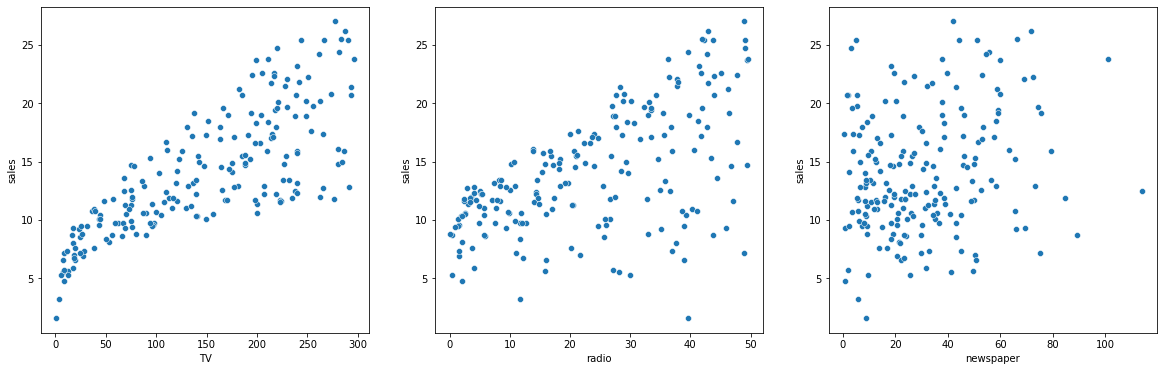

In [16]:
# 3개의 시각화를 한 화면에 배치합니다. 
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)

# 시각화의 사이즈를 설정해줍니다. 
figure.set_size_inches(20, 6)

# 미디어별 매체비 분포를 scatterplot으로 시각화해봅니다. 
sns.scatterplot(data=df, x="TV", y="sales", ax=ax1)
sns.scatterplot(data=df, x="radio", y="sales", ax=ax2)
sns.scatterplot(data=df, x="newspaper", y="sales", ax=ax3)

In [17]:
#t선형 회귀 분석

# stats model의 ols를 사용하여 선형회귀분석을 합니다. 

import statsmodels.formula.api as sm
model1 = sm.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        14:06:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
"""
해석  

* R-Square 0.897로 매우 높은 편
* P-value 0.05수준에서 유의한 변수는 TV, radio 입니다. 
* newspaper는 유의하지 않는 것으로 나타났습니다. 즉, 신문광고가 매출액에 미치는 영향은 유의하지 않다고 할 수 있습니다. 
* 회귀식은 다음과 같습니다. 
    sales = 2.9389 + 0.0458*TV + 0.1885*radio - 0.001*newspapaer 
"""


In [18]:
# sklearn의 선형회귀분석 결과와도 같습니다. 
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(features, Labels)
print(model.intercept_, model.coef_)

2.9388893694594067 [ 0.04576465  0.18853002 -0.00103749]


In [20]:
# 변수의 포함여부에 따른 ols 결과를 봅니다. 
model1 = sm.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()
model2 = sm.ols(formula = "sales ~ TV + radio", data=df).fit()
model3 = sm.ols(formula = "sales ~ TV", data=df).fit()

In [23]:
#모델1 TV + RADIO + NEWSPAPER
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        14:09:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [25]:
#모델2 TV + RADIO 
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           4.83e-98
Time:                        14:10:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [24]:
#모델3 TV 
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.47e-42
Time:                        14:10:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [ ]:
"""
### 결과 해석 
  * 유의하지 않은 변수 newspaper를 제거한 model2의 AIC, BIC가 가장 낮습니다. 
  * 여러개의 모델 중 선택을 할 때 AIC, BIC가 가장 낮은지 여부로 정하기도 합니다. 
  * 물론 AIC, BIC가 유일한 판단기준은 아니고 RMSE, CFI 등 다른 기준들과 함께 고려되어야 합니다. 
  * 결과에 따르면 p-vlaue가 0.05 이상으로, 신문광고는 매출액 예측에 있어서 변수의 유무가 통계적으로 유의한 차이를 보이지 않습니다.  
  * 즉, 신문광고 마케팅과 매출액은 관련이 없다고 할 수 있습니다. 
"""

In [26]:
# 각 미디어별 매체비에 따른 sales를 예측해봅니다. 
model1.predict({"TV" : 300, "radio": 10, "newspaper": 4})

0    18.549433
dtype: float64

In [27]:
sales = 2.9389 + 0.0458*300 + 0.1885*10 - 0.001*4
sales

18.5599

In [28]:
model3.predict({"TV":[300, 10, 50]})

0    21.293586
1     7.507960
2     9.409426
dtype: float64

In [ ]:
"""
## 데이터 변환 후 재분석
  * 신문광고가 유의미하지 않다고 나왔지만 데이터의 문제일 수도 있다는 생각이 들었습니다. 
  * 여러분이 2011년에 살고 있다고 가정하고, 여러분의 상사는 여전히 신문광고가 유의미하다고 생각하고 있습니다. 
  * 분석결과에 대해 상사로부터 데이터 샘플수가 적거나 데이터 처리가 잘못되어서 이런 결과가 나온 것이 아니냐는 지적을 받았습니다. 
"""

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

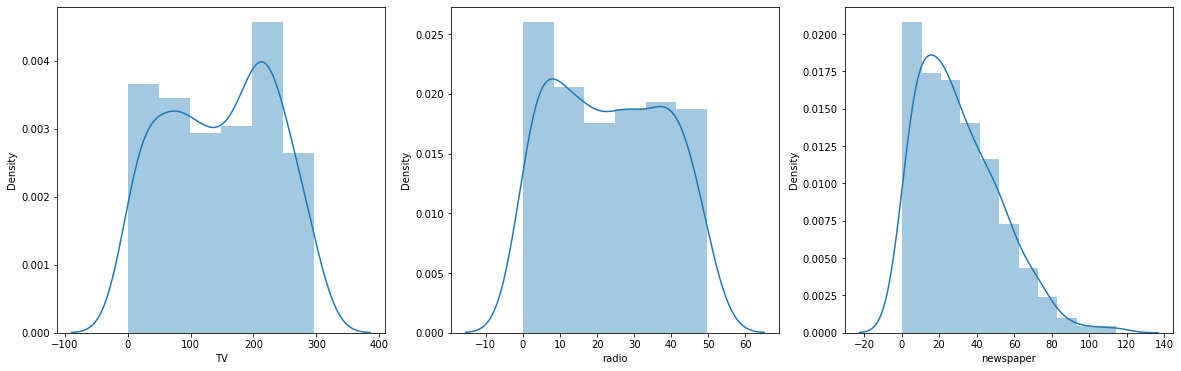

In [31]:
# 3개의 시각화를 한 화면에 배치합니다. 
figure, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3)

# 시각화의 사이즈를 설정해줍니다. 
figure.set_size_inches(20, 6)


# 미디어별 매체비 분포를 seaborn의 distplot으로 시각화해봅니다. 
sns.distplot(df["TV"], ax=ax1)
sns.distplot(df["radio"], ax=ax2)
sns.distplot(df["newspaper"], ax=ax3)

In [32]:
# 데이터 분포를 보니 newspaper 값이 치우쳐져 있습니다. 
# 정규화를 위해 로그 변환을 해줍니다. 

import numpy as np

df["log_newspaper"] = np.log(df["newspaper"] + 1)
print(df.shape)
df[["log_newspaper", "newspaper"]]


(200, 5)


,log_newspaper,newspaper
0,4.251348,69.2
1,3.830813,45.1
2,4.252772,69.3
3,4.085976,58.5
4,4.084294,58.4
...,...,...
195,2.694627,13.8
196,2.208274,8.1
197,2.001480,6.4
198,4.207673,66.2


<AxesSubplot:xlabel='log_newspaper', ylabel='Density'>

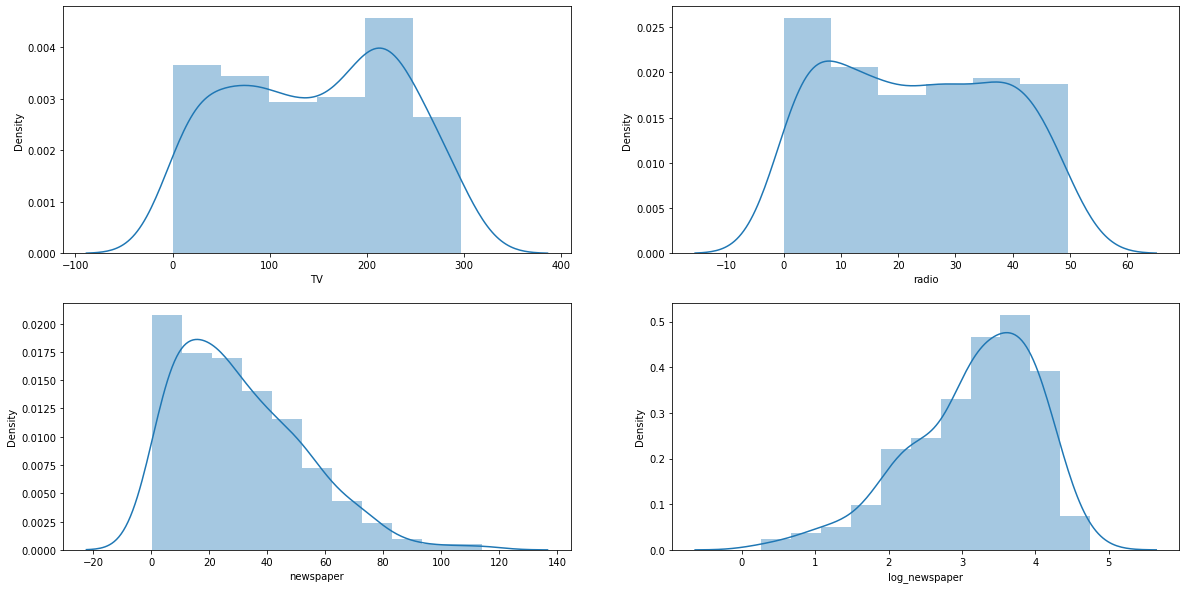

In [33]:
# 변환 결과를 시각화 해봅니다. 
# 4개의 시각화를 한 화면에 배치합니다. 
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# 시각화의 사이즈를 설정해줍니다. 
figure.set_size_inches(20, 10)


# 미디어별 매체비 분포를 seaborn의 distplot으로 시각화해봅니다. 
sns.distplot(df["TV"], ax=ax1)
sns.distplot(df["radio"], ax=ax2)
sns.distplot(df["newspaper"], ax=ax3)
sns.distplot(df["log_newspaper"], ax=ax4)

In [34]:
# 변환한 newspaper 변수 결과도 포함하여 ols 분석 결과를 봅니다. 
model1 = sm.ols(formula = "sales ~ TV + radio + newspaper", data=df).fit()

model4 = sm.ols(formula = "sales ~ TV + radio + log_newspaper", data=df).fit()

print(model1.summary())
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        14:21:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
"""
### 결과 해석 
  * 신문에 대한 상관계수는 음에서 양으로 변했지만 여전히 P-value 0.05수준에서 유의하지 않습니다.  
  * newspaper는 유의하지 않는 것으로 나타났습니다. 즉, 신문광고가 매출액에 미치는 영향은 유의하지 않다고 할 수 있습니다. 
  
# 적용 방안
  * 지금은 2011년이고 여러분의 상사는 여전히 신문광고가 유효하다고 생각하지만 데이터 분석결과는 그렇지 않습니다. 
  * 신문광고를 중단하고 TV, 라디오 광고 위주로 집행해야 합니다 .
  * 그런데 TV광고는 비용대비 효율은 조금 떨어지는 것 같습니다. 
  * 라디오 광고의 상관계수가 더 큽니다. 우리 제품은 라디오 광고를 할 수록 잘 팔리는 제품입니다. 
"""

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

x_train, x_valid, y_train, y_valid = train_test_split(features, Labels)

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(x_train, y_train)

LinearRegression()

In [56]:
pred = lr.predict(x_vaild)

In [61]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_valid})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True


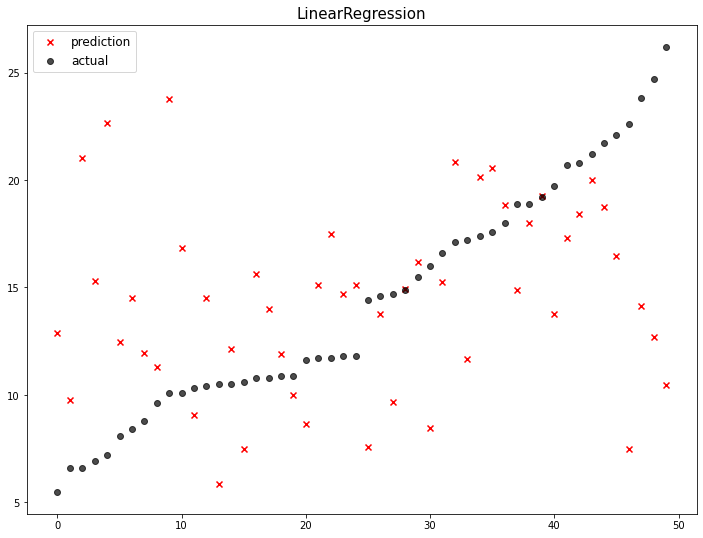

              model        mse
0  LinearRegression  41.239799


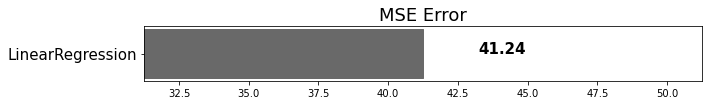

In [62]:
mse_eval('LinearRegression', pred, y_valid)

In [64]:
### feature 재설정

features = df[["TV", "radio"]]
Labels = df["sales"]

In [65]:
x_train, x_valid, y_train, y_valid = train_test_split(features , Labels)

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(x_train, y_train)

LinearRegression()

In [68]:
pred = lr.predict(x_valid)

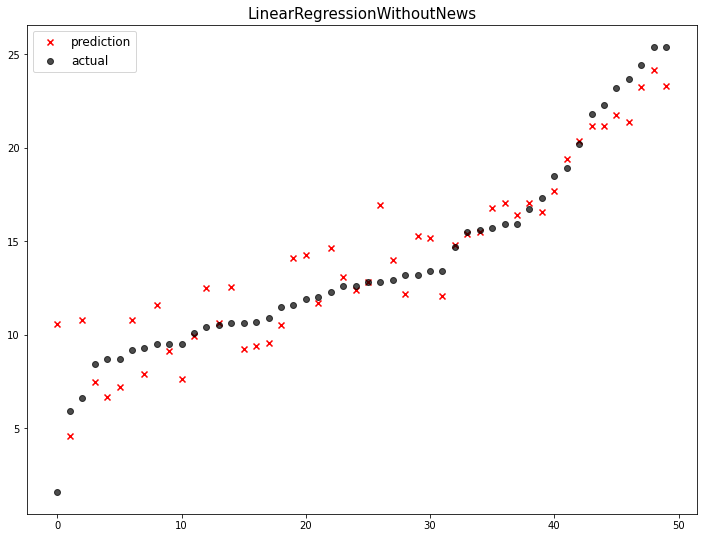

                         model        mse
0             LinearRegression  41.239799
1  LinearRegressionWithoutNews   4.017832


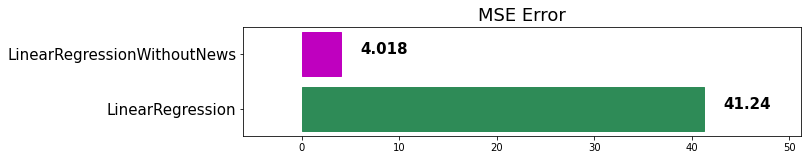

In [69]:
mse_eval('LinearRegressionWithoutNews', pred, y_valid)